本节描述各种Normalization的作用，参考
[an-overview-of-normalization-methods-in-deep-learning](http://mlexplained.com/2018/11/30/an-overview-of-normalization-methods-in-deep-learning/#more-775)
作者提到Batch Normalization的注意事项：

    1、如果min-batch size太小的话，效果可能不好；
    2、在rnn中不起作用。

另外使用BN的时候有一些陷阱。由于BN的机制，remember that batch normalization makes the loss function dependent on the batch size. 尤其是在分布式训练的时候，可能会出问题。还有在做fine-tune的时候，也要注意remember that batch normalization makes the loss function dependent on the batch size.

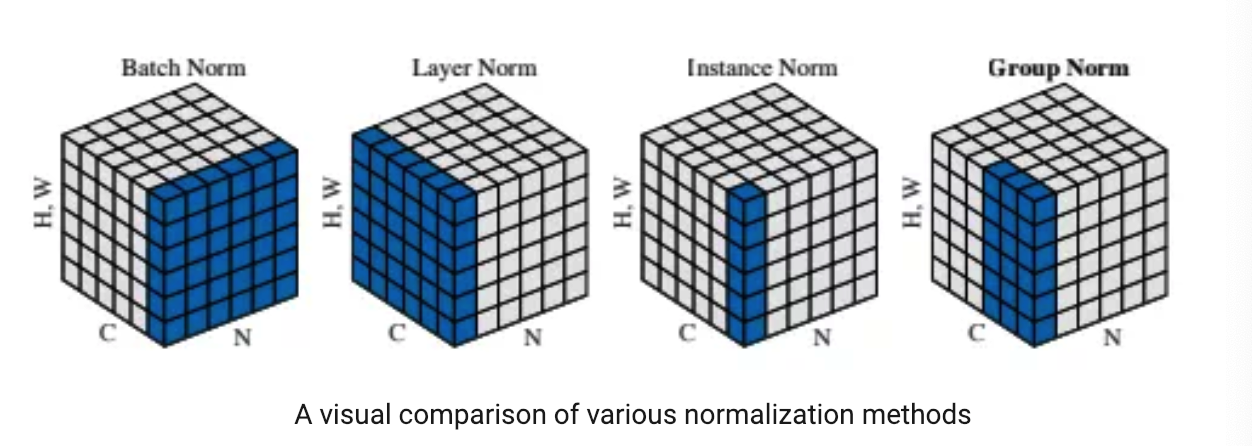

In [16]:
from IPython.display import Image
Image(filename='./images/all-norms.png')

### BatchNorm1d、BatchNorm2d、BatchNorm3d


In [11]:
import torch.nn as nn
import torch

# C from an expected input of size (N, C, L) or L from input of size (N, L)
m = nn.BatchNorm1d(3)
# Input: (N,C) or (N,C,L)
# input = torch.randn(2, 3)
input = torch.FloatTensor([[2, 2, 3], [8, 5, 6]])  # N=2,C=3
# Output: (N,C) or (N,C,L) (same shape as input)
output = m(input)
print(input)
print(output)

# C from an expected input of size (N,C,H,W)
m = nn.BatchNorm2d(2)
# input=(N,C,H,W)
input = torch.randn(3, 2, 4, 4)
output = m(input)
print(input)
print(output)


# C from an expected input of size (N,C,D,H,W)
m = nn.BatchNorm3d(2)
# Input: (N,C,D,H,W)
input = torch.randn(3, 2, 2, 10, 10)
output = m(input)
print(input)
print(output)

tensor([[2., 2., 3.],
        [8., 5., 6.]])
tensor([[-0.2339, -0.1105, -0.1557],
        [ 0.2339,  0.1105,  0.1557]], grad_fn=<NativeBatchNormBackward>)
tensor([[[[-0.5469,  0.1342,  1.3960,  1.4679],
          [ 1.1100, -0.6579,  0.1417, -0.9655],
          [ 0.9052,  0.5628,  0.0602, -0.6750],
          [ 0.9405, -1.0557, -0.1609,  2.2453]],

         [[-1.7692,  0.3125, -1.0025,  1.3694],
          [ 1.1780,  0.5859,  1.2846,  1.4040],
          [ 0.2108,  0.6696, -0.8693,  0.3598],
          [ 0.0599,  0.3339, -1.2573, -0.9966]]],


        [[[-1.2637, -0.7615, -0.7180,  0.4791],
          [ 1.9378,  0.3642, -1.0889,  0.8486],
          [ 2.1112,  0.7942,  0.1272,  0.9042],
          [-0.5976, -0.7382,  0.5181, -0.0105]],

         [[ 2.0568,  1.4572,  0.0762, -1.4512],
          [ 0.3909, -0.1729, -0.4563,  0.9214],
          [ 0.7368, -0.7237,  0.4153,  1.1136],
          [ 0.3086,  0.4505,  0.0452, -0.4657]]],


        [[[ 0.5698,  0.1838, -0.4970, -0.7977],
          [-1.054